## Load and Clean Data

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

df = pd.read_csv('house_prices.csv')
df_new = df[df.BldgType=='1Fam'].copy()
df_new = df_new.dropna()
df_new.head()

,Id,BldgType,LotArea,GrLivArea,YearBuilt,YrSold,SalePrice
0,1,1Fam,8450,1710.0,2003,2008,208500
2,3,1Fam,11250,1786.0,2001,2008,223500
3,4,1Fam,9550,1717.0,1915,2006,140000
4,5,1Fam,14260,2198.0,2000,2008,250000
5,6,1Fam,14115,1362.0,1993,2009,143000


## Split Data Into Train and Test

In [3]:
train_raw = df_new[df_new.YrSold < 2010].reset_index(drop=True)
test_raw = df_new[df_new.YrSold >= 2010].reset_index(drop=True)
train = train_raw[['GrLivArea', 'SalePrice']].copy()
test = test_raw[['GrLivArea', 'SalePrice']].copy()


## Get Features and Target

In [4]:
features = list(train.columns)
target = "SalePrice"
features.remove(target)

X_train = train[features].copy()
y_train = train[target].copy()

X_test = test[features].copy()
y_test = test[target].copy()

## Create Pipeline

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
steps = [('poly', PolynomialFeatures(degree=30)),
         ('rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
pipeline_lr = Pipeline(steps)
pipeline_lr = pipeline_lr.fit(X_train, y_train)

<font color='red'>Assignment:</font> Calculate train and test loss; plot **GrLivArea** vs **SalePrice** using test data, and overlay it with model to see how the model works with test data.

In [7]:
y_train_pred=pipeline_lr.predict(X_train)
y_test_pred=pipeline_lr.predict(X_test)

In [8]:
print("Linear Regression Test R2:", r2_score(y_test,y_test_pred))
print("Linear Regression Test MAE:",mean_absolute_error(y_test,y_test_pred))
print("Linear Regression Test MSE:",mean_squared_error(y_test,y_test_pred))

Linear Regression Test R2: 0.5765323424090693
Linear Regression Test MAE: 36124.50451231931
Linear Regression Test MSE: 2923416715.9692726


In [9]:
print("Linear Regression Train R2:",r2_score(y_train,y_train_pred))
print("Linear Regression Train MAE:",mean_absolute_error(y_train,y_train_pred))
print("Linear Regression Train MSE:",mean_squared_error(y_train,y_train_pred))

Linear Regression Train R2: 0.6305219277889831
Linear Regression Train MAE: 34739.9097538452
Linear Regression Train MSE: 2439707079.423607


In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def myPlot(area, price, model):
    plt.scatter(area, price, alpha=0.3)
    x = np.linspace(0, area.max())
    y = model.predict(x.reshape(-1,1))
    plt.plot(x, y, color='r')
    plt.xlabel('Living area')
    plt.ylabel('Sale price')
    plt.show()

C:\Users\Uma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


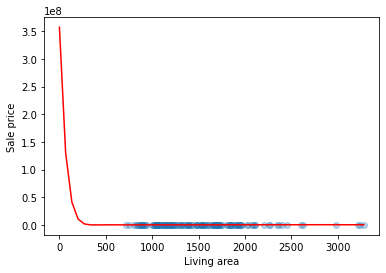

In [18]:
myPlot(test.GrLivArea, test.SalePrice, pipeline_lr)

# Lasso

<font color='red'>Assignment:</font> Use **Lasso** instead of **LinearRegression** in **Pipeline**. Tune **alpha** in **Lasso** to search for the  alpha that has the lowest test loss, which is your best model. Visualize your best model and calculate its R2 scores.

In [19]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error

In [22]:
avalues = list(np.logspace(-3, 3, 50))
mse_values = {}
for a in avalues:
    steps = [('poly', PolynomialFeatures(degree=3)),
             ('rescale', MinMaxScaler()),
             ('lr', Lasso(alpha=a, max_iter=100000))]
    model = Pipeline(steps)
    model = model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    mse_values[a] = mse

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Loss vs. alpha using Lasso')

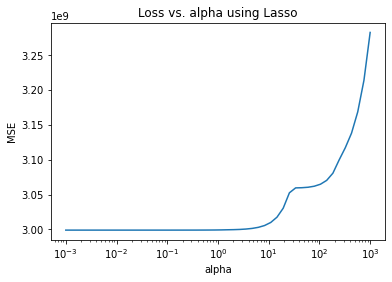

In [23]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(list(mse_values.keys()), list(mse_values.values()))
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Loss vs. alpha using Lasso')

To find best model, we will create a dictionary so we can store MSE values with keys corresponding to respective alpha 
values. Then we sift through the dictionary, finding least MSE value and then retrieve its key.

In [15]:
lowest_mse = min(mse_values.values())
lowest_mse_alpha = [key for key in mse_values if mse_values[key] == lowest_mse]
print("The alpha with lowest MSE is : " , lowest_mse_alpha)

The alpha with lowest MSE is :  [0.001]


In [16]:
steps = [('poly', PolynomialFeatures(degree=3)),
             ('rescale', MinMaxScaler()),
             ('lr', Lasso(alpha=lowest_mse_alpha, max_iter=100000))]
model = Pipeline(steps)
model = model.fit(X_train, y_train)
print("MSE",mean_squared_error(y_test, model.predict(X_test)))

MSE 2999038911.7008376


In [17]:
print('Calculating Train Losses')
print('Mean Squared Error: ',mean_squared_error(y_train,model.predict(X_train)))
print('Mean Absolute Error : ',mean_absolute_error(y_train,model.predict(X_train)))
print('R2 Score : ', r2_score(y_train,model.predict(X_train)))

Calculating Train Losses
Mean Squared Error:  2913613509.259187
Mean Absolute Error :  36545.075049815016
R2 Score :  0.5587518224428021


In [18]:
print('Calculating Test Losses')
print('Mean Squared Error : ',mean_squared_error(y_test,model.predict(X_test)))
print('Mean Absolute Error : ',mean_absolute_error(y_test,model.predict(X_test)))
print('R2 Score : ', r2_score(y_test,model.predict(X_test)))

Calculating Test Losses
Mean Squared Error :  2999038911.7008376
Mean Absolute Error :  36583.31602463315
R2 Score :  0.5655781893752582


C:\Users\Uma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


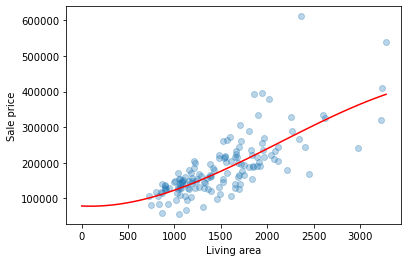

In [19]:
myPlot(test.GrLivArea, test.SalePrice, model)

<font color='red'>Question:</font> **Alpha** is a hyper parameter. What is hyper parameter? 

 Hyperparameters are the parameters which controls the learning process.They determine the values of model parameters which will be used by the algorithm for learning. The hyperparameter values are set initially before model trainning. The values of this hyper parameter is choosen after searching for the best combination of hyperparameters that result in the best performance on a given task.

<font color='red'>Question:</font> How does **alpha** affect model complexity?

The mark of a good model is less value of cost function. If alpha has higher value, it will make cost function bigger so to compensate for this , coefficient absolute value becomes less with unimportant coefficients becoming zero. Thus if alpha value is too high, algorithm can make important coefficient value zero, resulting in a simpler model and ultimately underfitting. 

<font color='red'>Question:</font> How does **alpha** affect the coefficient values?

If alpha value is too high, important coefficients can also become 0 resulting in a very simple model (underfitting) whereas is alpha value is too low, unimportant features will have high coefficients resulting in an unnecessarily complex model. The best way to find alpha is try out different values and see how well the model performs.

# Ridge

<font color='red'>Assignment:</font> Try **Ridge** instead of **Lasso**.

In [20]:
avalues = list(np.logspace(-3, 3, 50))
mse_values = {}
for a in avalues:
    steps = [('poly', PolynomialFeatures(degree=3)),
             ('rescale', MinMaxScaler()),
             ('lr', Ridge(alpha=a, max_iter=100000))]
    model = Pipeline(steps)
    model = model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    mse_values[a] = mse

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Loss vs. alpha using Ridge')

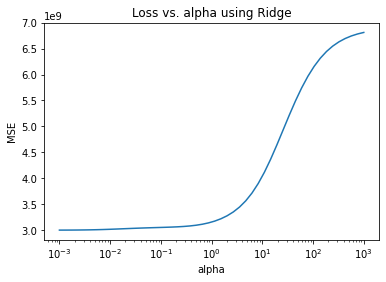

In [21]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(list(mse_values.keys()), list(mse_values.values()))
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Loss vs. alpha using Ridge')

In [22]:
lowest_mse = min(mse_values.values())
lowest_mse_alpha = [key for key in mse_values if mse_values[key] == lowest_mse]
print("The alpha with lowest MSE is : " , lowest_mse_alpha)

The alpha with lowest MSE is :  [0.001]


In [23]:
steps = [('poly', PolynomialFeatures(degree=3)),
             ('rescale', MinMaxScaler()),
             ('lr', Lasso(alpha=lowest_mse_alpha, max_iter=100000))]
model = Pipeline(steps)
model = model.fit(X_train, y_train)
print("MSE",mean_squared_error(y_test, model.predict(X_test)))

MSE 2999038911.7008376


In [24]:
print('Calculating Train Losses')
print('Mean Squared Error: ',mean_squared_error(y_train,model.predict(X_train)))
print('Mean Absolute Error : ',mean_absolute_error(y_train,model.predict(X_train)))
print('R2 Score : ', r2_score(y_train,model.predict(X_train)))

Calculating Train Losses
Mean Squared Error:  2913613509.259187
Mean Absolute Error :  36545.075049815016
R2 Score :  0.5587518224428021


In [25]:
print('Calculating Test Losses')
print('Mean Squared Error : ',mean_squared_error(y_test,model.predict(X_test)))
print('Mean Absolute Error : ',mean_absolute_error(y_test,model.predict(X_test)))
print('R2 Score : ', r2_score(y_test,model.predict(X_test)))

Calculating Test Losses
Mean Squared Error :  2999038911.7008376
Mean Absolute Error :  36583.31602463315
R2 Score :  0.5655781893752582


C:\Users\Uma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


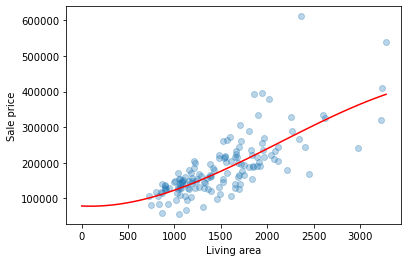

In [26]:
myPlot(test.GrLivArea, test.SalePrice, model)

<font color='red'>Question:</font> What is regularization? How does it work?

A too simple model will result in underfitting while a too complex model will result in overfitting to achieve a lesser variance in the tested data. We use regularisation to find a model thats neither too simple nor too complex. It does so by penalising higher value coefficients in cost function. There are two types of regression, Ridge and Lasso- both use different terms in cost function. 

<font color='red'>Question:</font> What are "L1" and "L2" regularizations, respectively? How are the effects on coefficients from **Ridge** and **Lasso** different?

In Ridge Regression (also known as L2 regularisation), we multiply alpha (hyperparameter) with squared value of coefficients while in Lasso Regression (also known as L1 regularisation), we multiply alpha (hyperparameter) with absolute of coefficients.

Ridge and Lasso Penalty contains all of estimated parameters except for y-intercept.

The main difference between Ridge and Lasso is that when value of alpha increases, Ridge Regression never makes coefficients zero- it just shrinks it. Whereas in Lasso Regression,at higher value of alpha, some (unimportant) coefficients become zero. So Lasso Regression filters out unimportant terms and Ridge does not.